In [503]:
import os
import numpy as np
from ast import literal_eval as make_tuple
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

% matplotlib inline 

#Implement a Basic Driving Agent

In [504]:
#os.system("basic_agent_without_deadline.py")

In [505]:
#os.system("basic_agent_with_deadline.py")

** QUESTION 1: Observe what you see with the agent's behavior as it takes random actions. Does the smartcab eventually make it to the destination? Are there any other interesting observations to note? **

** Answer: **

I implemented a basic agent that chooses the action randomly from [None, 'left', 'right', 'forward'] in each state and does not violate the US traffic rules (chooses not to take an action if the randomly chosen action violates the rules).

In basic_agent_with_deadline.py enforce_deadline is set up as True. Basic_agent_with_deadline.py writes results in a file basic_agent_with_deadline_report.txt, where he reports start location, destination, dealine, total reward, total amount of moves, end location and whether the trial was succesful or not. Analysis of report file is done in this ipynb. 

As we can see, only 23%  of trials was succeful. So sometimes smartcab makes it to the destination within the deadline. I implemented some comparison of failed and succesful trials. It does not seem that succesful trials had much longer deadlines or that the destinations for such trials were closer to the start locations. We can also see that end location of the agent in failed trials is not much closer to the destination than when he was at his the start location. Agent behaves randomly and definitely not optimal (he chooses for actions in the wrong directions, chooses to have no action while action would result in higher reward), resulting in very low rewards even for succesful trials.

In basic_agent_without_deadline.py enforce_deadline is set up as False. In 66% of cases agent made it to the destination with 24 moves on average and with reward 9, which is significantly lower than reward for succesful trials in experiment with a deadline.

See some analysis below:

### Experiment without deadline:

In [506]:
data1 = open('reports/basic_agent_without_deadline_report.txt').read()

print "Number of succesful trials is {} out of 100".format(100-data1.count('Primary agent hit hard time limit (-100)! Trial aborted'))

Number of succesful trials is 66 out of 100


In [507]:
a1 = [line for line in data1.split('\n')] 

remove_indices = []
for e,i in enumerate(a1):
    if 'Primary agent hit hard time limit (-100)! Trial aborted' in i:
        remove_indices.append(e-1)
        
a1 = [i for j, i in enumerate(a1) if j not in remove_indices]

moves = []
reward = []

for e,i in enumerate(a1):
    if 'LearningAgent.update()' in i:
        moves.append(float(a1[e].split('total_moves = ')[1].split(',')[0]))
        reward.append(float(a1[e].split('total_reward = ')[1].split(',')[0]))
               
print "Average number of moves for succesful trials in experiment without deadline is {}.".format(sum(moves)/len(moves))
print "Average reward for succesful trials in experiment without deadline is {}.".format(sum(reward)/len(reward))

Average number of moves for succesful trials in experiment without deadline is 23.9242424242.
Average reward for succesful trials in experiment without deadline is 9.20454545455.


### Experiment with a deadline:

In [508]:
data = open('reports/basic_agent_with_deadline_report.txt').read()
print "Number of succesful trials is {} out of 100".format(100-data.count('Primary agent ran out of time! Trial aborted'))

Number of succesful trials is 23 out of 100


In [509]:
a= [line for line in data.split('\n')] 

In [510]:
f_dist_between_start_and_dest = []
f_deadline = []

for e,i in enumerate(a):
    if 'Primary agent ran out of time! Trial aborted' in i:
        start = np.array(make_tuple(a[e-2].split('start = ')[1].split(', d')[0]))
        dest = np.array(make_tuple(a[e-2].split('destination = ')[1].split(', d')[0]))
        f_dist_between_start_and_dest.append(np.linalg.norm(start-dest))
        f_deadline.append(float(a[e-2].split('deadline = ')[1]))
        
print "Average euclidian distance between start and destination for failed trials is {}.".format(sum(f_dist_between_start_and_dest)/
                                                                                                 len(f_dist_between_start_and_dest))
print "Average deadline for failed trials is {}.".format(sum(f_deadline)/len(f_deadline))

Average euclidian distance between start and destination for failed trials is 4.68901784239.
Average deadline for failed trials is 29.7402597403.


In [511]:
s_dist_between_start_and_dest = []
s_deadline = []

for e,i in enumerate(a):
    if 'Primary agent has reached destination' in i:
        start = np.array(make_tuple(a[e-1].split('start = ')[1].split(', d')[0]))
        dest = np.array(make_tuple(a[e-1].split('destination = ')[1].split(', d')[0]))
        s_dist_between_start_and_dest.append(np.linalg.norm(start-dest))
        s_deadline.append(float(a[e-1].split('deadline = ')[1]))
        
print "Average euclidian distance between start and destination for succesful trials is {}.".format(sum(s_dist_between_start_and_dest)/
                                                                                                    len(s_dist_between_start_and_dest))
print "Average deadline for succesful trials is {}.".format(sum(s_deadline)/len(s_deadline))

Average euclidian distance between start and destination for succesful trials is 5.23099374877.
Average deadline for succesful trials is 33.0434782609.


In [512]:
f_rewards = []
f_moves = []
f_dist_between_end_loc_and_dest = []

for e,i in enumerate(a):
    if 'Primary agent ran out of time! Trial aborted' in i:
        f_rewards.append(float(a[e-1].split('total_reward = ')[1].split(',')[0]))
        f_moves.append(float(a[e-1].split('total_moves = ')[1].split(',')[0]))
        loc = np.array(make_tuple(a[e-1].split('location = ')[1].split(', d')[0]))
        dest = np.array(make_tuple(a[e-1].split('destination = ')[1]))
        f_dist_between_end_loc_and_dest.append(np.linalg.norm(loc-dest))
        
print "Average reward for a failed trial is {}.".format(sum(f_rewards)/len(f_rewards))
print "Average number of moves for a failed trial is {}.".format(sum(f_moves)/len(f_moves))
print "Average euclidian distance between end location and destination is {}.".format(sum(f_dist_between_end_loc_and_dest)/
                                                                                      len(f_dist_between_end_loc_and_dest))

Average reward for a failed trial is 4.50649350649.
Average number of moves for a failed trial is 30.7402597403.
Average euclidian distance between end location and destination is 4.29022920413.


In [513]:
s_rewards = []
s_moves = []

for e,i in enumerate(a):
    if 'Primary agent has reached destination' in i:
        s_rewards.append(float(a[e+1].split('total_reward = ')[1].split(',')[0]))
        s_moves.append(float(a[e+1].split('total_moves = ')[1].split(',')[0]))
               
print "Average reward for a succesful trial is {}.".format(sum(s_rewards)/len(s_rewards))
print "Average number of moves for a succesful trial is {}.".format(sum(s_moves)/len(s_moves))

Average reward for a succesful trial is 14.5869565217.
Average number of moves for a succesful trial is 17.1739130435.


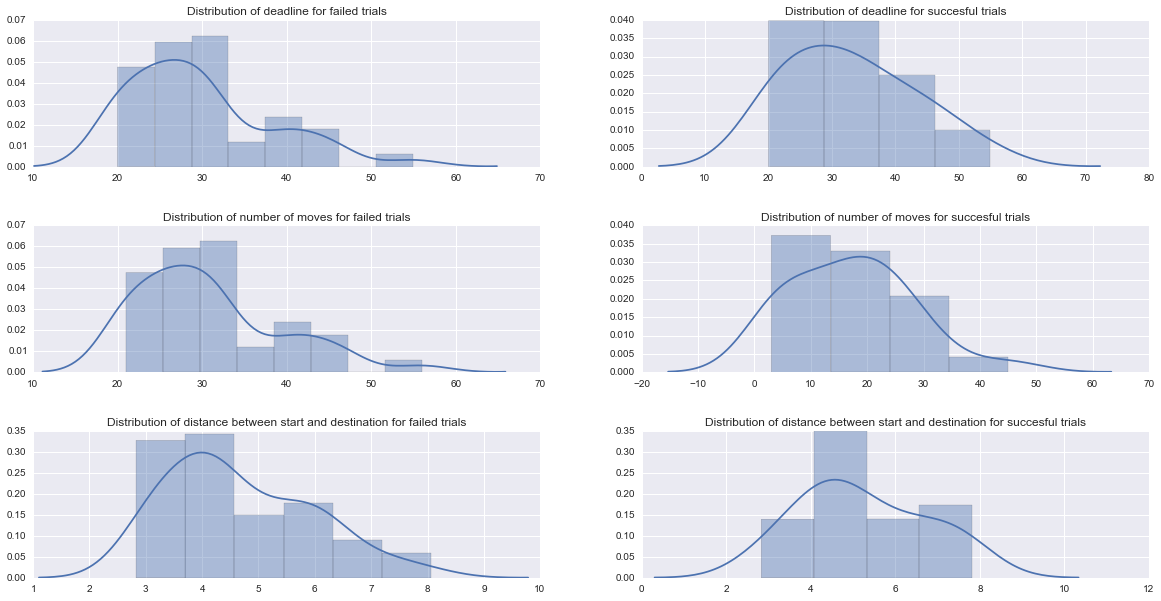

In [529]:
fg = plt.figure(figsize=(20,10))
adj = plt.subplots_adjust(hspace=0.4,wspace=0.2)

sp = plt.subplot(3,2,1)
l1 = sns.distplot(f_deadline)
tl = plt.title("Distribution of deadline for failed trials")

sp = plt.subplot(3,2,2)
l1 = sns.distplot(s_deadline)
tl = plt.title("Distribution of deadline for succesful trials")

sp = plt.subplot(3,2,3)
l1 = sns.distplot(f_moves)
tl = plt.title("Distribution of number of moves for failed trials")

sp = plt.subplot(3,2,4)
l1 = sns.distplot(s_moves)
tl = plt.title("Distribution of number of moves for succesful trials")

sp = plt.subplot(3,2,5)
l1 = sns.distplot(f_dist_between_start_and_dest)
tl = plt.title("Distribution of distance between start and destination for failed trials")

sp = plt.subplot(3,2,6)
l1 = sns.distplot(s_dist_between_start_and_dest)
tl = plt.title("Distribution of distance between start and destination for succesful trials")

plt.show()

# Inform the driving agent

** QUESTION 2: What states have you identified that are appropriate for modeling the smartcab and environment? Why do you believe each of these states to be appropriate for this problem? **

** Answer: **

To define the state, I decided to use information about traffic lights (inputs['light']) and information about other cars (inputs['oncoming'], inputs['left'], inputs['right']) in order not to violate the US traffic rules, as well as next_waypoint from the planner for knowledge of the route agent has to take.

I believe that this is sufficient information for the agent to find a optimal path how to drive. The primary concern is that the agent drives safely. I could also include deadline as another component defining state, but decided not to do so. I find safety more important than arriving on time, also adding this component would increase the amount of possible states and would make Q learning more complicated.

#Implement a Q-Learning Driving Agent

In [515]:
#os.system("first_q_agent.py")

** QUESTION 3: What changes do you notice in the agent's behavior when compared to the basic driving agent when random actions were always taken? Why is this behavior occurring? **

** Answer: **

First attempt of q-Learning is implemented in first_q_agent.py. For q-agent I chose to set epsilon=.1, alpha=.5, gamma=.7, init_q_value=15. These values were chosen randomly. Improvements (by choosing different epsilon/ alpha/ gamma/ init_q_value) are done later.

We can notice that the agent has a  better understanding of the environment than the basic agent. He is trying the reach the destination and does not just randomly take the actions. For example, he does not keep staying in the same state on green light and without any traffic coming like basic agent could do, because taking an action towards the destination would result in higher reward (and this is what the agent learns).

It results in almost 2 times higher rewards for succesful trials and much less moves on average. q-agent reaches the destination before the deadline in 82% of the trials. It is better than performance of basic agent without the deadline!

In [516]:
data2 = open('reports/first_q_agent_report.txt').read()
print "Number of succesful trials is {} out of 100".format(100-data2.count('Primary agent ran out of time! Trial aborted'))

Number of succesful trials is 80 out of 100


In [517]:
a2 = [line for line in data2.split('\n')] 

In [519]:
q_rewards = []
q_moves = []

for e,i in enumerate(a2):
    if 'Primary agent has reached destination' in i:
        q_rewards.append(float(a2[e+1].split('total_reward = ')[1].split(',')[0]))
        q_moves.append(float(a2[e+1].split('total_moves = ')[1].split(',')[0]))
               
print "Average reward for a succesful trial is {}.".format(sum(q_rewards)/len(q_rewards))
print "Average number of moves for a succesful trial is {}.".format(sum(q_moves)/len(q_moves))

Average reward for a succesful trial is 27.99375.
Average number of moves for a succesful trial is 16.5625.


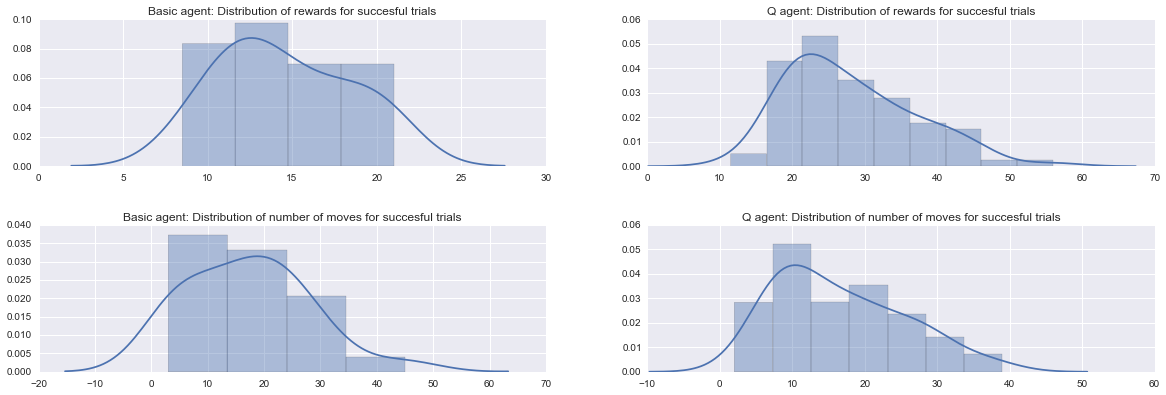

In [520]:
fg = plt.figure(figsize=(20,10))
adj = plt.subplots_adjust(hspace=0.4,wspace=0.2)

sp = plt.subplot(3,2,1)
l1 = sns.distplot(s_rewards)
tl = plt.title("Basic agent: Distribution of rewards for succesful trials")

sp = plt.subplot(3,2,2)
l1 = sns.distplot(q_rewards)
tl = plt.title("Q agent: Distribution of rewards for succesful trials")

sp = plt.subplot(3,2,3)
l1 = sns.distplot(s_moves)
tl = plt.title("Basic agent: Distribution of number of moves for succesful trials")

sp = plt.subplot(3,2,4)
l1 = sns.distplot(q_moves)
tl = plt.title("Q agent: Distribution of number of moves for succesful trials")

plt.show()

#Improve the Q-Learning Driving Agent

**QUESTION 4: Report the different values for the parameters tuned in your basic implementation of Q-Learning. For which set of parameters does the agent perform best? How well does the final driving agent perform? **

** Answer: **

q_agent_modified.py allows to pass variables to the script from the command line and generates the report with passed parameters  values in it.

Some results of iterations are shown in results_df dataframe. The highest number of succesful trials (88 out of 100) belongs to the set up with the following parameters:

    epsilon = 0.05 (small amount of randomness in the selection of an action)
    
    alpha = 0.9 (high learning rate)
    
    gamma = 0.5 (not too high discount factor that trades off the importance of sooner versus later rewards)
    
    init_q_value = 15.0 (optimistic Q learning: we initialize Q value at a high level to force the agent to explore
    different actions; in our case it is higher than the maximum observed reward)

I select this agent as a final agent

In [521]:
#os.system("q_agent_modified.py 0.1 0.5 0.8 15")

In [522]:
files = []

for fn in os.listdir('reports'):
    if fn not in ['basic_agent_without_deadline_report.txt','basic_agent_with_deadline_report.txt']:
        files.append(fn)

In [523]:
dataset = [[]]*len(files)
dataset_list = [[]]*len(files)

succesful_count = [[]]*len(files)
rewards = [[]]*len(files)
moves = [[]]*len(files)
penalties = [[]]*len(files)


for i in range(len(files)):
    dataset[i] = open("reports/"+files[i]).read()
    succesful_count[i] = 100-dataset[i].count('Primary agent ran out of time! Trial aborted')
    dataset_list[i] = [line for line in dataset[i].split('\n')] 
    rewards[i] = np.average([float(dataset_list[i][e+1].split('total_reward = ')[1].split(',')[0]) for e,m in enumerate(dataset_list[i]) 
     if 'Primary agent has reached destination' in m])
    moves[i] = np.average([float(dataset_list[i][e+1].split('total_moves = ')[1].split(',')[0]) for e,m in enumerate(dataset_list[i]) 
     if 'Primary agent has reached destination' in m])
    penalties[i] = np.average([float(dataset_list[i][e+1].split('penalty = ')[1].split(',')[0]) for e,m in enumerate(dataset_list[i]) 
     if 'Primary agent has reached destination' in m])

In [527]:
result_df = pd.DataFrame(zip(files, succesful_count, rewards, moves, penalties),
             columns=['File','Number of succesful trials','Average reward', 'Average number of moves', 'Average penalty'])
result_df['File1'] = result_df['File'].apply(lambda x: 'q_agent_0.1_0.5_0.8_15.0.txt' if x=='first_q_agent_report.txt' else x)
result_df['epsilon'] = result_df['File1'].apply(lambda x: x.split('_')[2])
result_df['alpha'] = result_df['File1'].apply(lambda x: x.split('_')[3])
result_df['gamma'] = result_df['File1'].apply(lambda x: x.split('_')[4])
result_df['init_q_value'] = result_df['File1'].apply(lambda x: x.split('_')[5].split('.t')[0])
result_df = result_df.drop('File1', axis = 1)

In [528]:
result_df

,File,Number of succesful trials,Average reward,Average number of moves,Average penalty,epsilon,alpha,gamma,init_q_value
0,first_q_agent_report.txt,80,27.993750,16.562500,-2.593750,0.1,0.5,0.8,15.0
1,q_agent_0.05_0.4_0.5_15.0.txt,82,28.140244,15.646341,-2.414634,0.05,0.4,0.5,15.0
2,q_agent_0.05_0.4_0.6_15.0.txt,85,29.035294,15.752941,-2.252941,0.05,0.4,0.6,15.0
3,q_agent_0.05_0.5_0.5_10.0.txt,84,26.869048,14.297619,-2.107143,0.05,0.5,0.5,10.0
4,q_agent_0.05_0.5_0.5_12.0.txt,87,28.212644,15.597701,-2.362069,0.05,0.5,0.5,12.0
5,q_agent_0.05_0.5_0.5_15.0.txt,84,26.398810,14.119048,-2.232143,0.05,0.5,0.5,15.0
6,q_agent_0.05_0.5_0.5_20.0.txt,83,28.427711,15.771084,-2.373494,0.05,0.5,0.5,20.0
7,q_agent_0.05_0.5_0.6_15.0.txt,79,27.006329,13.772152,-1.930380,0.05,0.5,0.6,15.0
8,q_agent_0.05_0.5_0.7_15.0.txt,78,28.205128,15.269231,-2.256410,0.05,0.5,0.7,15.0
9,q_agent_0.05_0.5_0.9_15.0.txt,85,26.929412,13.941176,-2.064706,0.05,0.5,0.9,15.0


**QUESTION 5: Does your agent get close to finding an optimal policy, i.e. reach the destination in the minimum possible time, and not incur any penalties? How would you describe an optimal policy for this problem? **

** Answer: **

An optimal policy for a driving agent is the policy that leads to the very success rate and very few penalties.

It looks like the final agent is very close to an optimal policy. Success rate could be higher (in this tryout we achieve 88%, but I ran the agent multiple times and could achieve 92% in the best case).

We can see that agent makes it to the destination with relatively small amount of moves on average (agent does not end up making circles, but selects a short route to the destination) and receives a high total reward and very low penalty on average (final agent has the lowest average penalty among agents with tried parameters).
